#Data Science Lifecycle
© 2023, Zaka AI, Inc. All Rights Reserved.

---
##Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models. We will need from it the following functions: LabelEncoder, train_test_split, LogisticRegression, and accuracy_score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes
Don't forget to print the head of your dataset to get a better insight into it.

In [3]:
d1 = pd.read_csv('test.csv')
d2 = pd.read_csv('train.csv')
data = pd.concat([d1, d2])
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002648,Male,Yes,0,Graduate,No,2130,6666.0,70.0,180.0,1.0,Semiurban,N
1,LP002652,Male,No,0,Graduate,No,5815,3666.0,311.0,360.0,1.0,Rural,N
2,LP002659,Male,Yes,3+,Graduate,No,3466,3428.0,150.0,360.0,1.0,Rural,Y
3,LP002670,Female,Yes,2,Graduate,No,2031,1632.0,113.0,480.0,1.0,Semiurban,Y
4,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N
5,LP002683,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,N
6,LP002684,Female,No,0,Not Graduate,No,3400,0.0,95.0,360.0,1.0,Rural,N
7,LP002689,Male,Yes,2,Not Graduate,No,2192,1742.0,45.0,360.0,1.0,Semiurban,Y
8,LP002690,Male,No,0,Graduate,No,2500,0.0,55.0,360.0,1.0,Semiurban,Y
9,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y


# 3. Exploratory Data Analysis


Start by getting the number of rows and the number of columns that you have in your dataset

In [243]:
rows = data.shape[0]
columns = data.shape[1]
print('There are {} rows and {} columns in our dataset.'.format(rows,columns))

There are 614 rows and 13 columns in our dataset.


##### Use the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


Where did you find some missing values?     

**There are missing values in the following columns : Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History.** 

##### Use the function describe(), to check the following  values for each numerical feature (column)
- mean
- standard deviation 
- maximum
- minimum 


In [245]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Print the unique values of the variable Credit_History

In [246]:
print(data['Credit_History'].dropna().unique())

[1. 0.]


Do the same with the variable Loan_Amount_Term

In [247]:
print(data['Loan_Amount_Term'].dropna().unique())

[180. 360. 480.  36.  84. 240. 120.  60. 300.  12.]


##### Use the function describe(include='o'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [248]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002648,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Interpret the results you obtained for the variable Gender

**the "Gender" column have a total of 601 non-null records, it also have 13 missing value since there's 614 rows in our dataset, the data is divided between two unique categories "Male" and "Female", the "Male" category is the dominant category with a frequency equal to 489 out of 601 non-null records.**

Compute the frequency for each unique value in the categorical feature specified in the code cells below

In [43]:
print(data['Property_Area'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [44]:
print(data['Dependents'].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Create a new dataframe removeNA_df, where you remove the nulls existing in the original dataframe. This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way 

In [5]:
removeNA_df = data.dropna()

Plot the distribution and the boxplot for the variable 'LoanAmount'

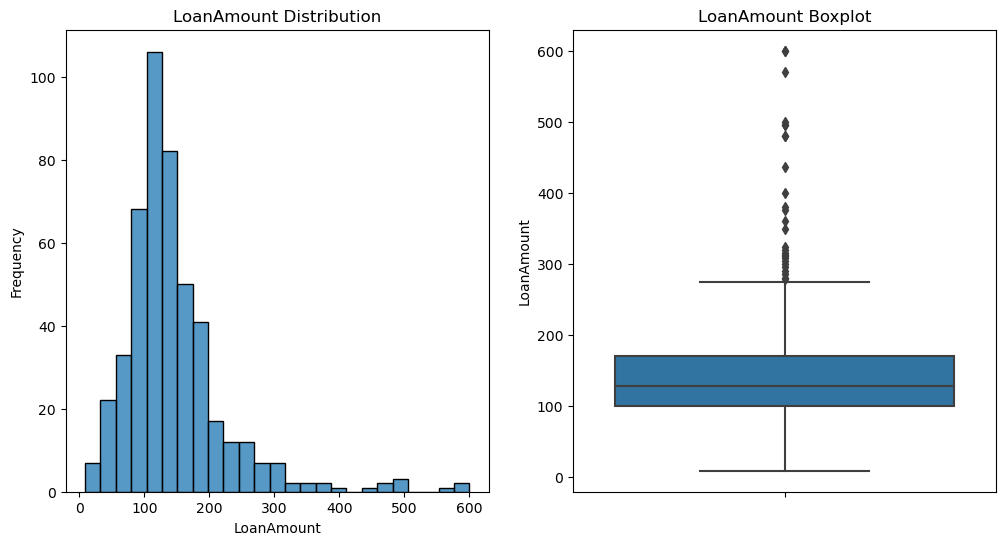

In [140]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=removeNA_df, x='LoanAmount', bins=25)
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.title('LoanAmount Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=removeNA_df, y='LoanAmount')
plt.ylabel('LoanAmount')
plt.title('LoanAmount Boxplot')

plt.show()

* Is there any outlier?
* Is the data skewed?

**There's outliers and the data is right-skewed.**

Do the same for the variable 'ApplicantIncome'

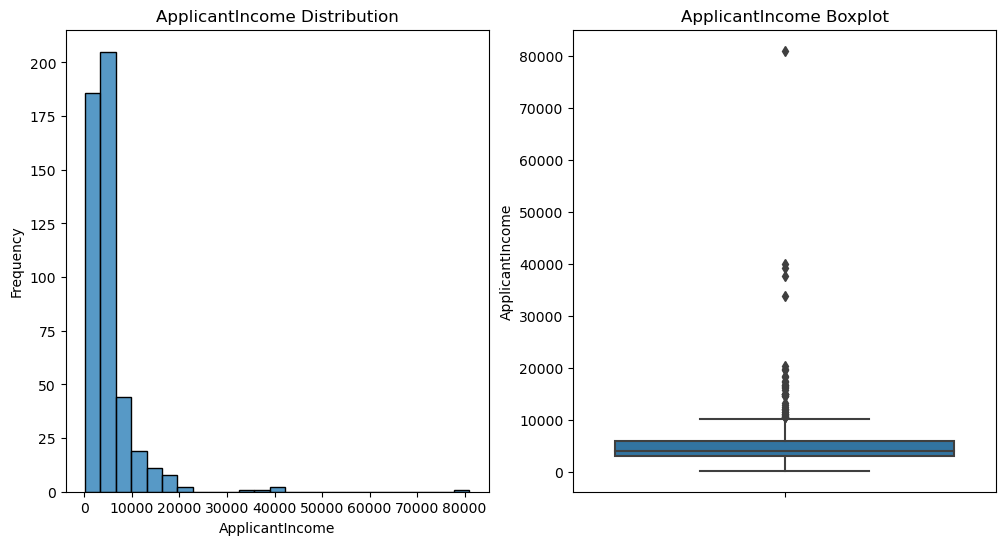

In [141]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=removeNA_df, x='ApplicantIncome', bins=25)
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.title('ApplicantIncome Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=removeNA_df, y='ApplicantIncome')
plt.ylabel('ApplicantIncome')
plt.title('ApplicantIncome Boxplot')

plt.show()

* Is there any outlier?
* Is the data skewed?

**There's outliers and the data is right-skewed.**

Do the same for 'CoapplicantIncome'

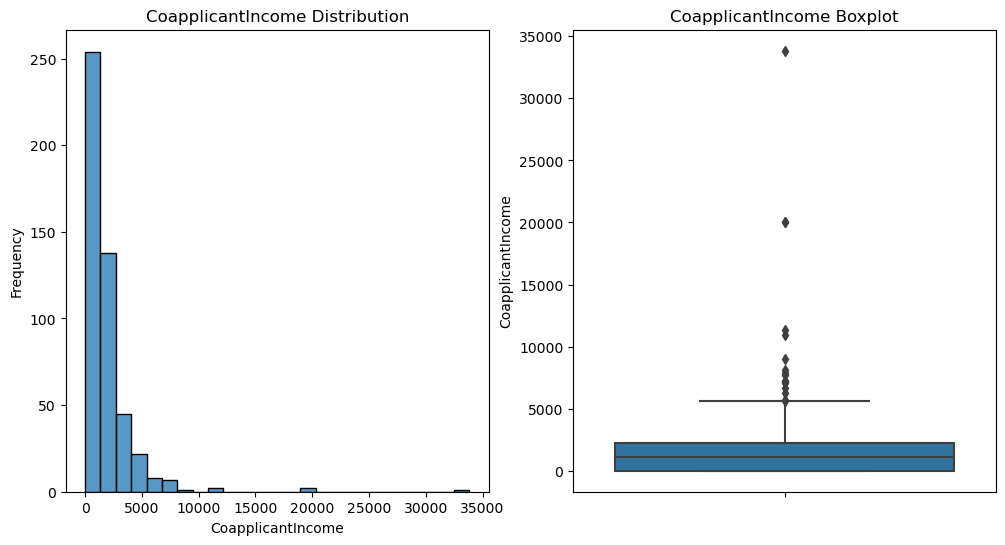

In [164]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=removeNA_df, x='CoapplicantIncome', bins=25)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Frequency')
plt.title('CoapplicantIncome Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=removeNA_df, y='CoapplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.title('CoapplicantIncome Boxplot')
plt.show()

**There's outliers and the data is right-skewed.**

Do the same for 'Loan_Amount_Term'

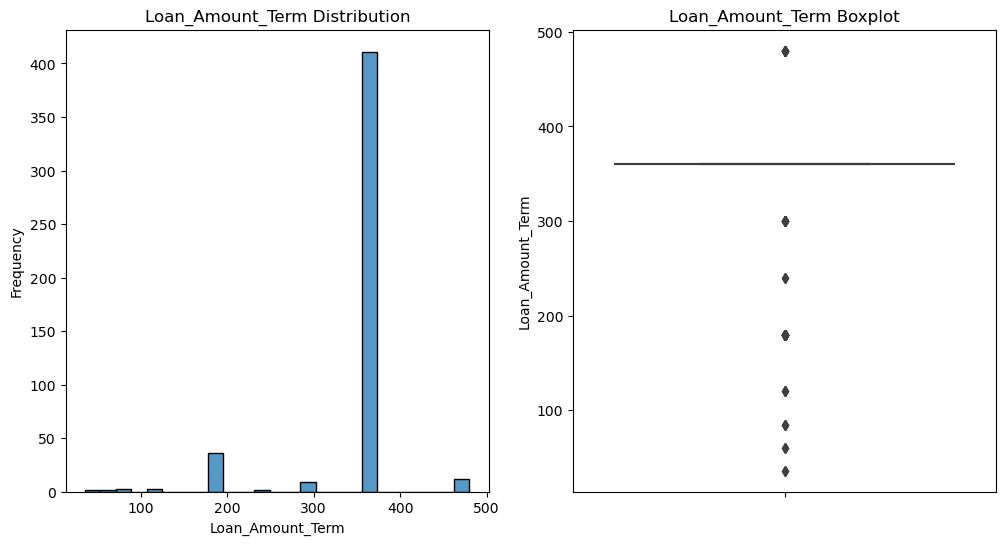

In [148]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=removeNA_df, x='Loan_Amount_Term', bins=25)
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Frequency')
plt.title('Loan_Amount_Term Distribution')


plt.subplot(1, 2, 2)
sns.boxplot(data=removeNA_df, y='Loan_Amount_Term')
plt.ylabel('Loan_Amount_Term')
plt.title('Loan_Amount_Term Boxplot')

plt.show()

What do you think about outliers in this case?

**Due to the central concentration of values, these outliers might not carry substantial significance.**

Plot the value_counts for 'Loan_Amount_term'

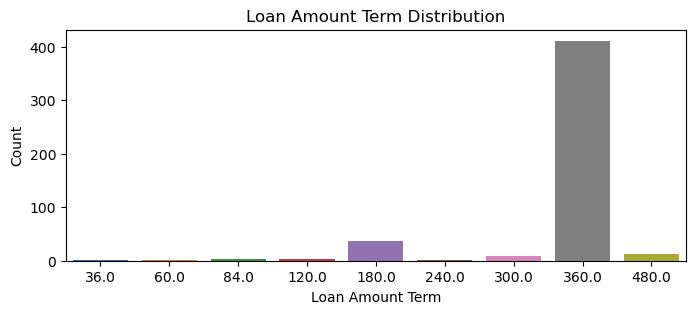

In [188]:
plt.figure(figsize=(8, 3))
sns.countplot(data=removeNA_df, x='Loan_Amount_Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.title('Loan Amount Term Distribution')
plt.show() 

Do the same for the categorical variables you have ('Dependants', 'Education', etc), using a subplot of size 4 by 2

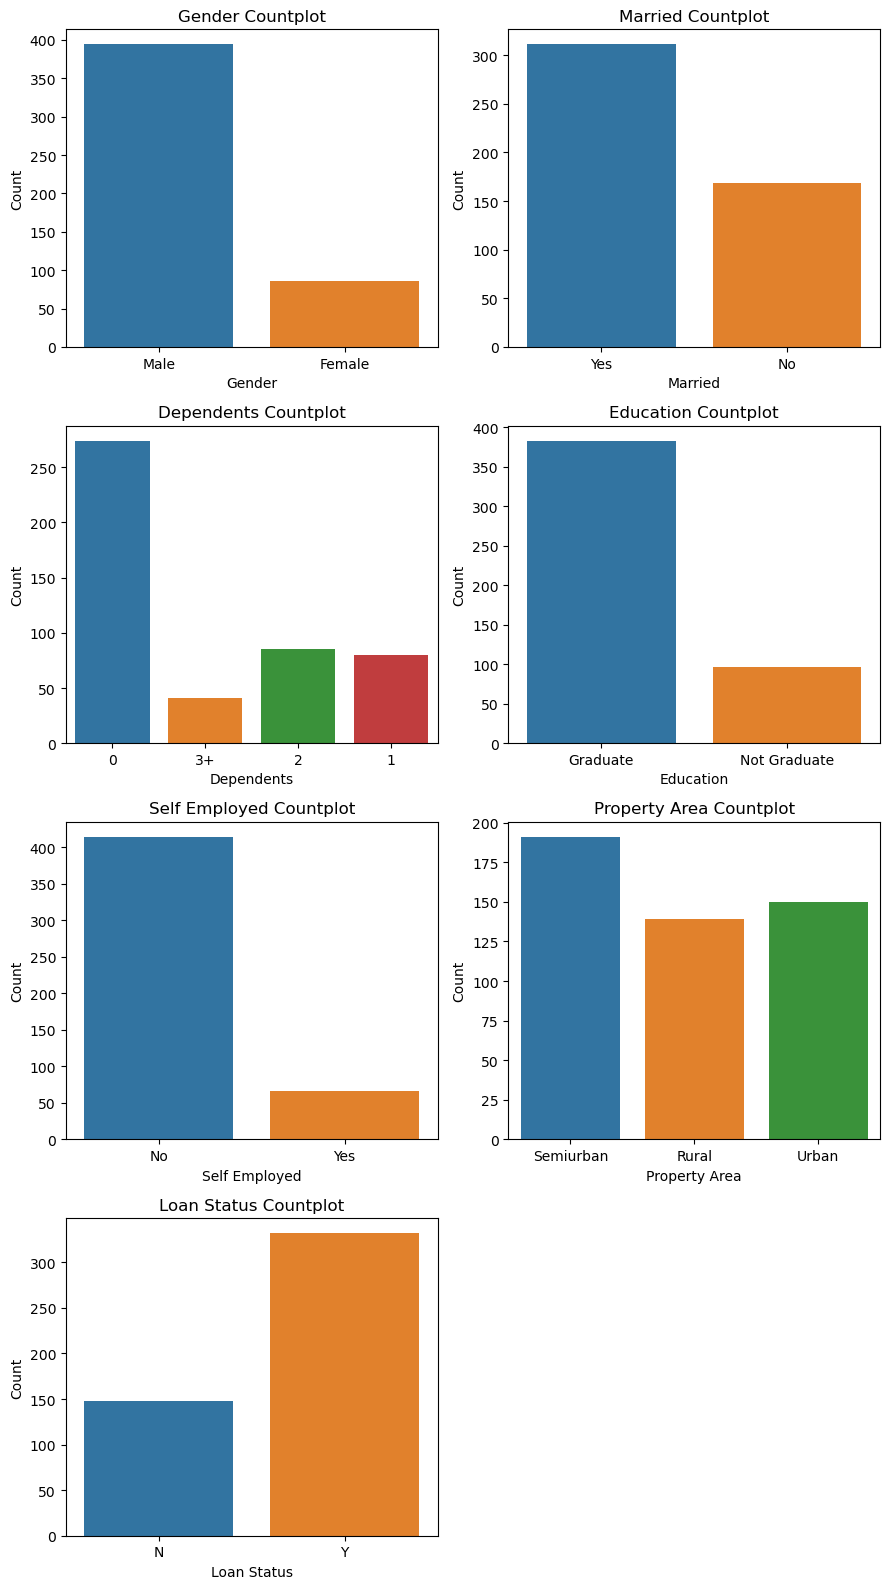

In [201]:
plt.figure(figsize=(9, 16))

plt.subplot(4, 2, 1)
sns.countplot(data=removeNA_df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Countplot')

plt.subplot(4, 2, 2)
sns.countplot(data=removeNA_df, x='Married')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Married Countplot')


plt.subplot(4, 2, 3)
sns.countplot(data=removeNA_df, x='Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Dependents Countplot')

plt.subplot(4, 2, 4)
sns.countplot(data=removeNA_df, x='Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Countplot')

plt.subplot(4, 2, 5)
sns.countplot(data=removeNA_df, x='Self_Employed')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.title('Self Employed Countplot')

plt.subplot(4, 2, 6)
sns.countplot(data=removeNA_df, x='Property_Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Property Area Countplot')

plt.subplot(4, 2, 7)
sns.countplot(data=removeNA_df, x='Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Countplot')

plt.tight_layout()

plt.show()

Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

<Figure size 600x600 with 0 Axes>

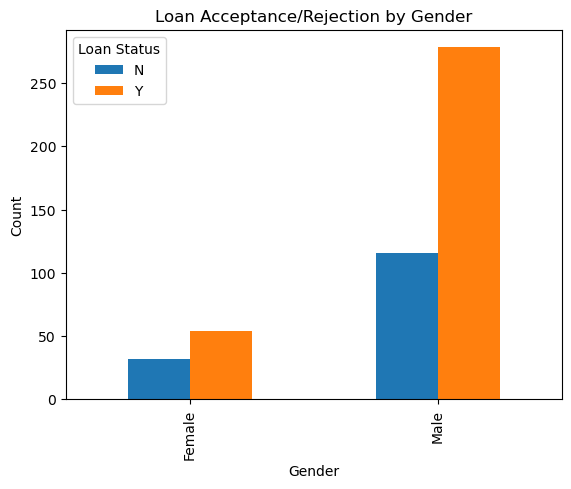

In [213]:
gender_loan_crosstab = pd.crosstab(removeNA_df['Gender'], removeNA_df['Loan_Status'])
plt.figure(figsize=(6, 6))
gender_loan_crosstab.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan Acceptance/Rejection by Gender')
plt.legend(title='Loan Status', labels=['N', 'Y'])
plt.show()

Does the Gender affect the acceptance of the Loan?

**No.**

Do the same with Credit_history and Loan_Status

<Figure size 600x600 with 0 Axes>

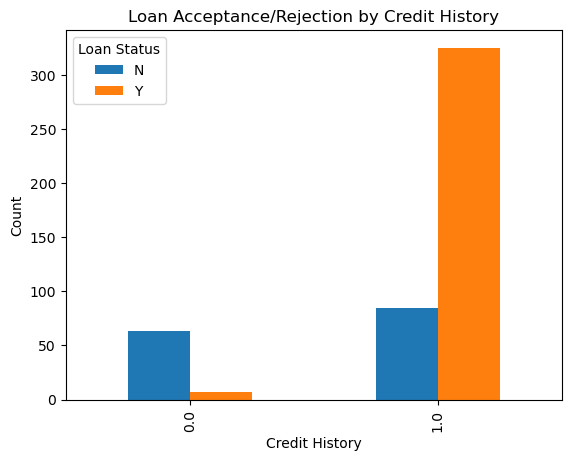

In [150]:
credit_history_loan_crosstab = pd.crosstab(removeNA_df['Credit_History'], removeNA_df['Loan_Status'])
plt.figure(figsize=(6, 6))
credit_history_loan_crosstab.plot(kind='bar')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Loan Acceptance/Rejection by Credit History')
plt.legend(title='Loan Status', labels=['N', 'Y'])
plt.show()

Does the Credit History affect the acceptance of the Loan?

**Yes.**

Do the same with Dependents and Loan_Status

<Figure size 600x600 with 0 Axes>

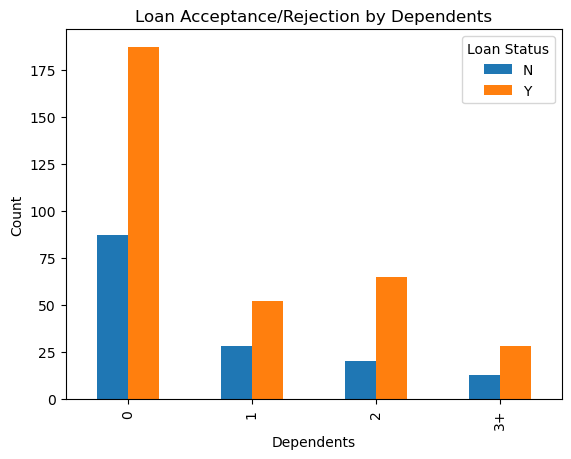

In [155]:
dependents_loan_crosstab = pd.crosstab(removeNA_df['Dependents'], removeNA_df['Loan_Status'])
plt.figure(figsize=(6, 6))
dependents_loan_crosstab.plot(kind='bar')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Loan Acceptance/Rejection by Dependents')
plt.legend(title='Loan Status', labels=['N', 'Y'])
plt.show()

Does the number of dependents affect the acceptance of the Loan?

**No.**

Do the same between Education and Loan_Status

<Figure size 600x600 with 0 Axes>

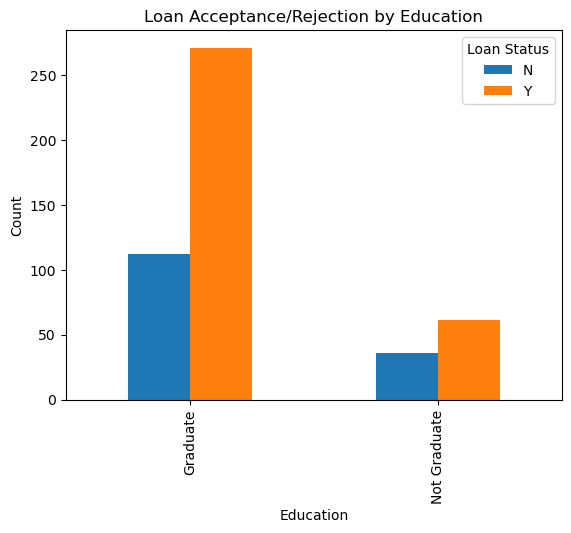

In [157]:
education_loan_crosstab = pd.crosstab(removeNA_df['Education'], removeNA_df['Loan_Status'])
plt.figure(figsize=(6, 6))
education_loan_crosstab.plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Loan Acceptance/Rejection by Education')
plt.legend(title='Loan Status', labels=['N', 'Y'])
plt.show()

Does the level of education affect the acceptance of the Loan?

**No.**

Do the same between Married and Loan_Status

<Figure size 600x600 with 0 Axes>

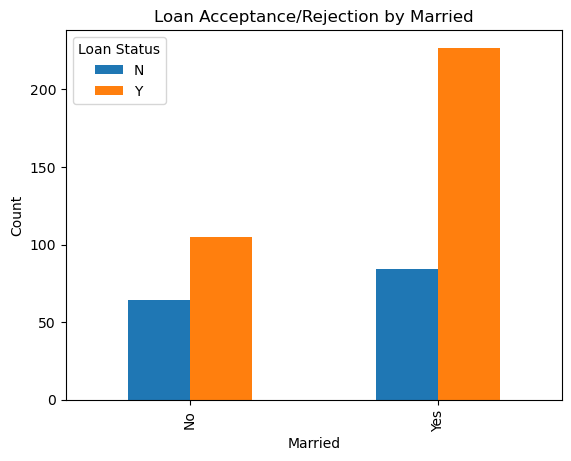

In [8]:
married_loan_crosstab = pd.crosstab(removeNA_df['Married'], removeNA_df['Loan_Status'])
plt.figure(figsize=(6, 6))
married_loan_crosstab.plot(kind='bar')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Loan Acceptance/Rejection by Married')
plt.legend(title='Loan Status', labels=['N', 'Y'])
plt.show()

Does the marriage affect the acceptance of the Loan?

**Yes.**

Do the same between Property_Area and Loan_Status

<Figure size 600x600 with 0 Axes>

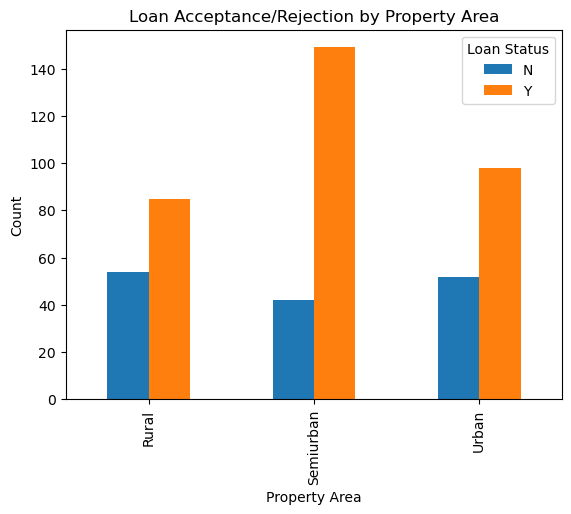

In [160]:
property_area_loan_crosstab = pd.crosstab(removeNA_df['Property_Area'], removeNA_df['Loan_Status'])
plt.figure(figsize=(6, 6))
property_area_loan_crosstab.plot(kind='bar')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Loan Acceptance/Rejection by Property Area')
plt.legend(title='Loan Status', labels=['N', 'Y'])
plt.show()

Does the Property Area affect the acceptance of the Loan?

**Yes.**

Do the same between Self_Employed and Loan_Status

<Figure size 600x600 with 0 Axes>

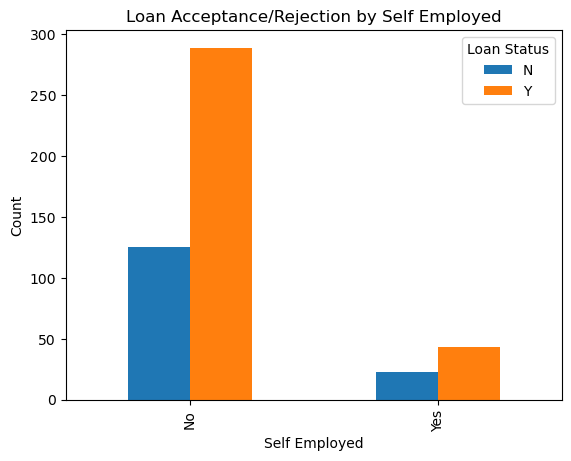

In [161]:
self_employed_loan_crosstab = pd.crosstab(removeNA_df['Self_Employed'], removeNA_df['Loan_Status'])
plt.figure(figsize=(6, 6))
self_employed_loan_crosstab.plot(kind='bar')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.title('Loan Acceptance/Rejection by Self Employed')
plt.legend(title='Loan Status', labels=['N', 'Y'])
plt.show()

Does the Self Employed Property affect the acceptance of the Loan?

**No.**

Plot a Scatter Plot between Loan_Status and: 
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

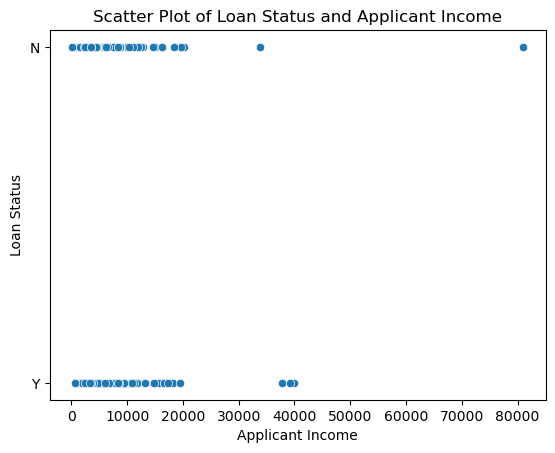

In [163]:
sns.scatterplot(data=removeNA_df, x='ApplicantIncome', y='Loan_Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Status')
plt.title('Scatter Plot of Loan Status and Applicant Income')
plt.show()

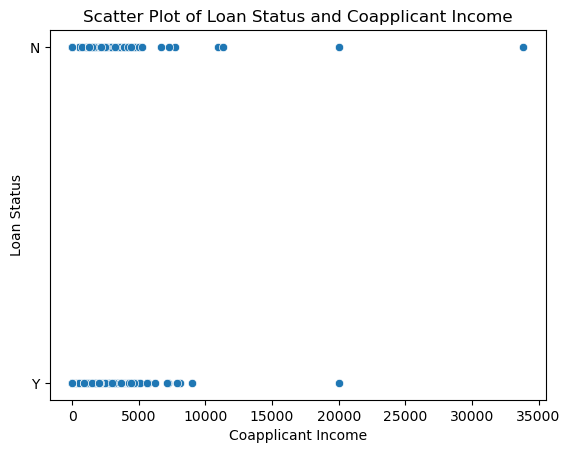

In [165]:
sns.scatterplot(data=removeNA_df, x='CoapplicantIncome', y='Loan_Status')
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Status')
plt.title('Scatter Plot of Loan Status and Coapplicant Income')
plt.show()

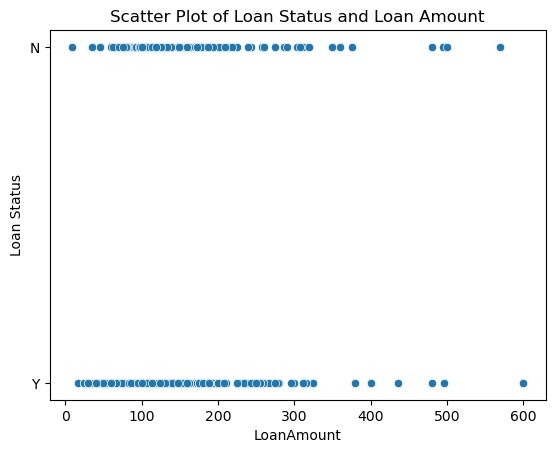

In [176]:
sns.scatterplot(data=removeNA_df, x='LoanAmount', y='Loan_Status')
plt.xlabel('LoanAmount')
plt.ylabel('Loan Status')
plt.title('Scatter Plot of Loan Status and Loan Amount')
plt.show()

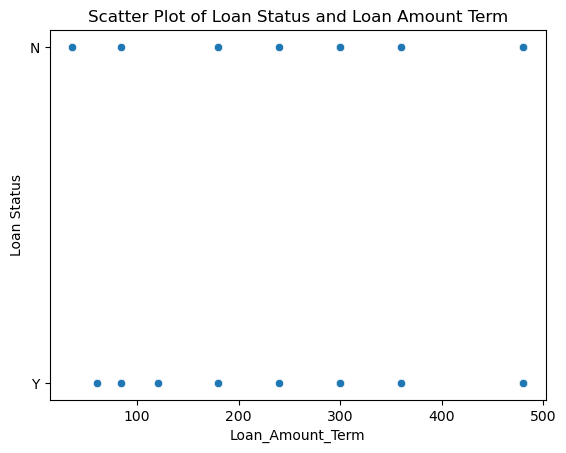

In [179]:
sns.scatterplot(data=removeNA_df, x='Loan_Amount_Term', y='Loan_Status')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Loan Status')
plt.title('Scatter Plot of Loan Status and Loan Amount Term')
plt.show()

Do you think these scatter plots gave you valuable information about the Loan_Status?

**No because scatter plots are not the ideal choice for visualizing the relationship between a categorical variable in 'Loan_Status' and a numerical variable in 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' and 'Loan_Amount_Term'.**

Group your dataframe by Loan_Status on the median Value

In [6]:
removeNA_df.groupby('Loan_Status').median(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3871.0,0.0,128.0,360.0,1.0
Y,3858.5,1211.5,128.0,360.0,1.0


What did you deduce?

**ApplicantIncome, LoanAmount and Loan_Amount_Term might not strongly impact loan approval since their median is similar or equal in both cases, in addition higher CoapplicantIncome might relate to higher chances of approval since it's 0.0 in the rejection case and 1211.5 in the acceptance case, finally having a credit history appears to be equally important for both cases based on their median.**

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status

In [4]:
data.drop('Loan_ID', axis=1, inplace=True)
data.drop('Gender', axis=1, inplace=True)
data.drop('Education', axis=1, inplace=True)
data.drop('Self_Employed', axis=1, inplace=True)

## Remove grabage data

If you go back to one of the EDA steps where you saw the unique values of Dependents, you can see that you have '3+' as a value. In order to make the algorithm learn from such information, you have to replace this with a number. We will replace it by 3.

In [5]:
data['Dependents'] = data['Dependents'].replace('3+', '3')

##Convert continuous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [6]:
data['Credit_History'] = data['Credit_History'].astype('category')

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [7]:
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

## Check if any null value exist

In [8]:
data.isnull().sum()

Married              0
Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encode categorical data

Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [9]:
categorical_col = ['Married', 'Dependents', 'Credit_History', 'Property_Area', 'Loan_Status']
encoder = LabelEncoder()
for i in categorical_col:   
  data[i] = encoder.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 512
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int32  
 1   Dependents         614 non-null    int32  
 2   ApplicantIncome    614 non-null    int64  
 3   CoapplicantIncome  614 non-null    float64
 4   LoanAmount         614 non-null    float64
 5   Loan_Amount_Term   614 non-null    float64
 6   Credit_History     614 non-null    int64  
 7   Property_Area      614 non-null    int32  
 8   Loan_Status        614 non-null    int32  
dtypes: float64(3), int32(4), int64(2)
memory usage: 38.4 KB


## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data

In [10]:
max_values = data.max()
data = data.divide(max_values)
data.describe()

,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,0.248100,0.066709,0.038910,0.209160,0.712500,0.855049,0.518730,0.687296
std,0.476373,0.336541,0.075420,0.070229,0.120054,0.134109,0.352339,0.393741,0.463973
min,0.000000,0.000000,0.001852,0.000000,0.012857,0.025000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.035525,0.000000,0.143214,0.750000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.047068,0.028524,0.184286,0.750000,1.000000,0.500000,1.000000
75%,1.000000,0.333333,0.071543,0.055134,0.235357,0.750000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Training & Validating

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [11]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(429, 8) (429,)
(185, 8) (185,)


##Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)
print('Model trained !')

Model trained !


##Validating the model

Validate your model on the testing data, and compute the accuracy score of your predictions

In [13]:
res = model.fit(X_train, y_train)
pred = res.predict(X_test)
print('Model score {}'.format(accuracy_score(y_test, pred)))

Model score 0.772972972972973


#7. Feature Importance

Evaluate the feature importance in your resulting model, and plot it

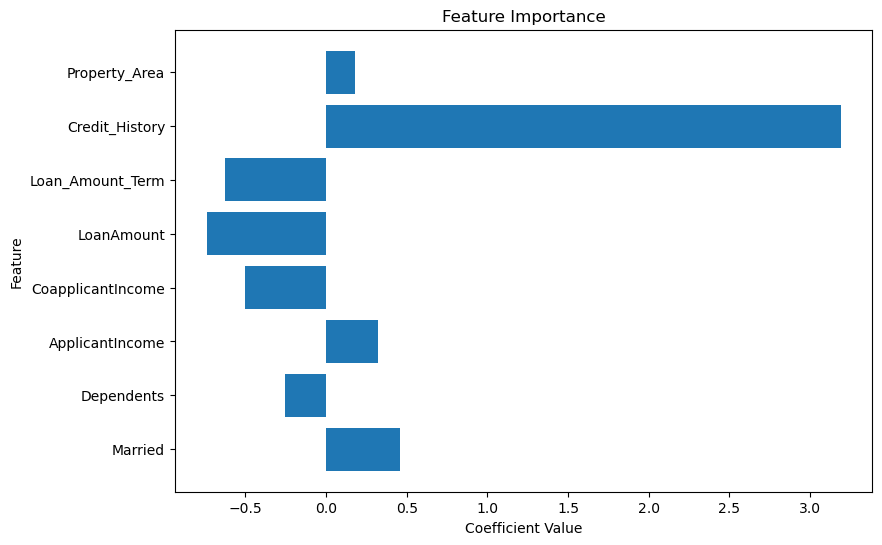

In [19]:
plt.figure(figsize=(9, 6))
columns_names = X.columns
Feature_Importance = model.coef_[0]
plt.barh(columns_names, Feature_Importance)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

What's the most important feature?

**Credit_History**